In [1]:
# importing libraries    
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd   
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
from matplotlib import pyplot

In [2]:
# Importing the dataset  
dataset = pd.read_csv('data.csv')  
dataset = dataset[dataset.percentage_no_of_correct_responses != 0]
dataset.head()
# statistics of the data
# dataset.describe()

,id,child_gender,child_age,total_correct_responses,correct_responses,commission_errors,omission_errors,mean_reaction_time,total_duration,diagnosis,percentage_no_of_correct_responses,oer,cer,game
0,1,2,4,19,18,0,1,1479,57000,No,94.736842,5.263158,0.000000,Alternating
1,2,1,4,19,19,0,0,1605,57000,No,100.000000,0.000000,0.000000,Alternating
2,3,2,4,19,18,3,1,1404,57000,No,94.736842,5.263158,15.789474,Alternating
3,4,2,4,19,19,4,0,1782,57000,No,100.000000,0.000000,21.052632,Alternating
4,5,2,4,19,19,6,0,1258,57000,No,100.000000,0.000000,31.578947,Alternating


In [3]:
x = dataset.iloc[:, [2, 10]].values  
display(x)

array([[  4.        ,  94.73684211],
       [  4.        , 100.        ],
       [  4.        ,  94.73684211],
       [  4.        , 100.        ],
       [  4.        , 100.        ],
       [  4.        ,  78.94736842],
       [  4.        , 100.        ],
       [  4.        ,  78.94736842],
       [  4.        ,  94.73684211],
       [  4.        ,  68.42105263],
       [  4.        , 100.        ],
       [  5.        , 100.        ],
       [  5.        ,  94.73684211],
       [  5.        ,  89.47368421],
       [  5.        , 100.        ],
       [  5.        , 100.        ],
       [  5.        ,  94.73684211],
       [  5.        ,  94.73684211],
       [  5.        , 100.        ],
       [  5.        , 100.        ],
       [  5.        ,  84.21052632],
       [  5.        ,  68.42105263],
       [  6.        , 100.        ],
       [  6.        , 100.        ],
       [  6.        , 100.        ],
       [  6.        , 100.        ],
       [  6.        , 100.        ],
 

In [4]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(x).describe()

,0,1
count,3.620000e+02,3.620000e+02
mean,1.275836e-16,-1.113903e-15
std,1.001384e+00,1.001384e+00
min,-1.165531e+00,-5.397237e+00
25%,-1.165531e+00,-2.742502e-01
50%,-2.581713e-01,5.088114e-01
75%,6.491881e-01,5.088114e-01
max,1.556547e+00,5.088114e-01


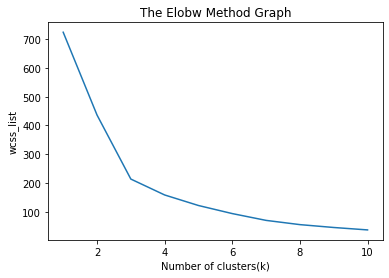

In [5]:
# Finding the optimal number of clusters using the elbow method
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()

[0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 2 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 2 0 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 2 2 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 2 0 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1]


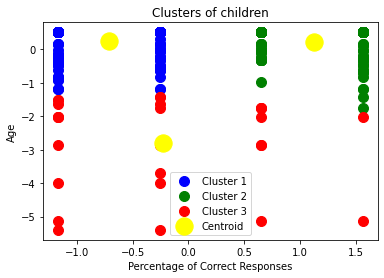

In [6]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=3, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)  
print(y_predict)

#visulaizing the clusters  
mtp.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
mtp.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
mtp.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'red', label = 'Cluster 3') #for third cluster    
mtp.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroid')   
mtp.title('Clusters of children')  
mtp.xlabel('Percentage of Correct Responses')  
mtp.ylabel('Age')  
mtp.legend()  
mtp.show()  

In [7]:
new_df = dataset.iloc[:, [2, 10]].copy()
new_df['clusters'] = y_predict
new_df.head()
display(new_df)

,child_age,percentage_no_of_correct_responses,clusters
0,4,94.736842,0
1,4,100.000000,0
2,4,94.736842,0
3,4,100.000000,0
4,4,100.000000,0
...,...,...,...
358,7,80.000000,1
359,7,88.888889,1
360,7,82.142857,1
361,7,100.000000,1


# Cluster Analysis

## Cluster 1

In [8]:
len(new_df[new_df["clusters"] == 0])

201

In [9]:
cluster_1 = new_df[new_df["clusters"] == 0 ]

maxVal = cluster_1['percentage_no_of_correct_responses'].max()
minVal = cluster_1['percentage_no_of_correct_responses'].min()

print(minVal)
print(maxVal)

75.0
100.0


,child_age,percentage_no_of_correct_responses,clusters
0,4,94.736842,0
1,4,100.000000,0
2,4,94.736842,0
3,4,100.000000,0
4,4,100.000000,0
...,...,...,...
335,5,80.000000,0
336,5,88.235294,0
337,5,84.615385,0
338,5,100.000000,0


<AxesSubplot:>

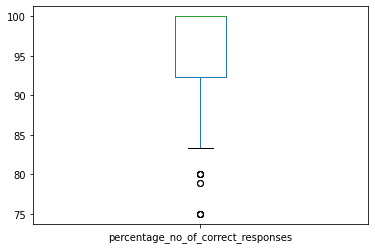

In [10]:
display(cluster_1)
cluster_1.boxplot(column =['percentage_no_of_correct_responses'], grid = False)

## Cluster 2

In [11]:
len(new_df[new_df["clusters"] == 1])

133

In [12]:
cluster_2 = new_df[new_df["clusters"] == 1 ]

maxVal = cluster_2['percentage_no_of_correct_responses'].max()
minVal = cluster_2['percentage_no_of_correct_responses'].min()

print(minVal)
print(maxVal)

66.66666667
100.0


,child_age,percentage_no_of_correct_responses,clusters
22,6,100.000000,1
23,6,100.000000,1
24,6,100.000000,1
25,6,100.000000,1
26,6,100.000000,1
...,...,...,...
358,7,80.000000,1
359,7,88.888889,1
360,7,82.142857,1
361,7,100.000000,1


<AxesSubplot:>

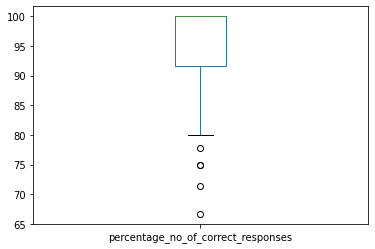

In [13]:
display(cluster_2)
cluster_2.sort_values('percentage_no_of_correct_responses')
cluster_2.boxplot(column =['percentage_no_of_correct_responses'], grid = False)

## Cluster 3

In [14]:
len(new_df[new_df["clusters"] == 2])

28

In [15]:
cluster_3 = new_df[new_df["clusters"] == 2 ]

maxVal = cluster_3['percentage_no_of_correct_responses'].max()
minVal = cluster_3['percentage_no_of_correct_responses'].min()

print(minVal)
print(maxVal)

12.5
71.42857143


,child_age,percentage_no_of_correct_responses,clusters
9,4,68.421053,2
21,5,68.421053,2
39,4,62.500000,2
40,4,62.500000,2
42,4,50.000000,2
49,4,62.500000,2
56,5,37.500000,2
58,5,12.500000,2
63,6,62.500000,2
78,7,62.500000,2


<AxesSubplot:>

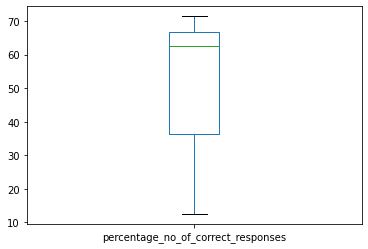

In [16]:
display(cluster_3)
cluster_3.sort_values('percentage_no_of_correct_responses')
cluster_3.boxplot(column =['percentage_no_of_correct_responses'], grid = False)

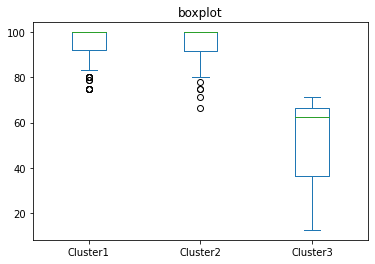

In [17]:
from matplotlib import pyplot as plt

# Pandas dataframe
data = pd.DataFrame({"Cluster1": cluster_1['percentage_no_of_correct_responses'], "Cluster2": cluster_2['percentage_no_of_correct_responses'], "Cluster3": cluster_3['percentage_no_of_correct_responses']})

# Plot the dataframe
ax = data[['Cluster1', 'Cluster2', 'Cluster3']].plot(kind='box', title='boxplot')

# Display the plot
plt.show()